In [14]:
import numpy as np
import matplotlib.pyplot as plt
import handytools.navigator as nav
from spectools.que import IQue

In [2]:
unit = 435
hkey = 11
R_ori = 22.959854

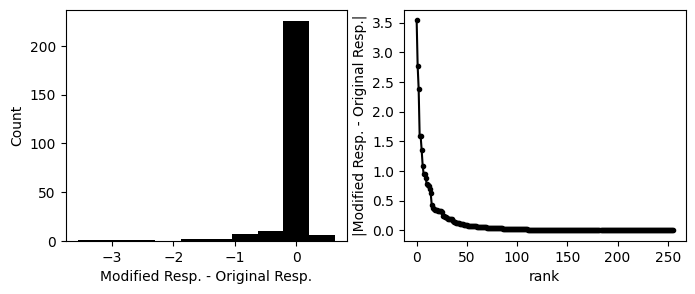

In [11]:
diff = nav.npload("/src", "results", "subtraction_VGG16", f"max_unit={unit}_key={hkey}.npy")
diff_abs = abs(diff)
diff_sort = sorted(diff_abs, reverse=True)

fig, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].hist(diff, color="k")
axs[1].plot(diff_sort, "k.", linestyle="-")
axs[0].set_xlabel("Modified Resp. - Original Resp."); axs[0].set_ylabel("Count")
axs[1].set_xlabel("rank"); axs[1].set_ylabel("|Modified Resp. - Original Resp.|")
plt.show()

In [25]:
top = 10
preunits = np.argsort(diff_abs)[::-1][:top]

IQ = IQue()
for t in range(top):
    try:
        r2_dri = IQ("DRI", "VGG16", 8, preunits[t])
        r2_foi = IQ("FOI", "VGG16", 8, preunits[t])
        print(r2_dri, r2_foi)
    except KeyError:
        pass

0.8679157346487045 0.8809279128909111
0.9404322728514671 0.6571975946426392
0.928078681230545 0.7729455232620239
0.7028330564498901 0.0
0.8982657939195633 0.7548984885215759
0.8717904537916183 0.8034345507621765
0.7508396208286285 0.25950193405151367
0.8765944615006447 0.9129701554775238
0.8473910987377167 0.1295229196548462
0.9341628924012184 0.0
